In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,rt_user_id,rt_text,rt_creation,rt_fav,rt_rt,Toxicity,Severe Toxicity,NewDateFormat,week,month
0,4746709454,just_jusss,911477065328631809,"Having a strict dad, if I ask to go out one we...",1.506159e+09,1.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.052305,0.002346,2017-09-23 09:27:21,38,09
1,4746709454,just_jusss,911399501264384001,Lookin at all these couples like MBN🤧 but then...,1.506140e+09,2.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.068171,0.003433,2017-09-23 04:19:08,38,09
2,4746709454,just_jusss,911343372282900480,Being a senior kinda sucks when most of your f...,1.506127e+09,3.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.518691,0.023787,2017-09-23 00:36:06,38,09
3,773711528398848000,CassandraCohan,923729371235586049,@periwinkledink So pretty,1.509076e+09,1.0,0.0,True,923705106264027136,3.434322e+09,...,NaN,NaN,NaN,NaN,NaN,0.010681,0.002117,2017-10-27 03:53:38,43,10
4,773711528398848000,CassandraCohan,923689995763843072,@readyforramos It’s 2017 we go to church and pray,1.509067e+09,3.0,0.0,True,923689936406044673,2.633570e+09,...,NaN,NaN,NaN,NaN,NaN,0.018975,0.001316,2017-10-27 01:17:10,43,10


In [6]:
groupDf = df[['user_id', 'Toxicity', 'qt_flag', 'rt_flag', 'week', 'month']]

In [7]:
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()

# Plot 1
## Sum of toxicities across all users per week
> **X Axis** - Week Number (wk1 wk2 ... wk43)

> **Y Axis** - Sum of Toxicity

##### <u>Sample Calcualtion</u>
Lets say I want to calculate this for week 1. First I filter the entire dataframe to week 1 - `weekDf = df[df['week'] == "01"]`. Then, the plot would look something like this: - 
1.   <u>x axis</u> - 01
2.   <u>y axis</u> - `weekDf['Toxicity'].sum()` - Just the some of the entire column in the dataframe as that would give us the net toxicity for that week

In [8]:
def weightedSumToxicityWeek(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    return weekDf['Toxicity'].sum().round(2)

In [9]:
plot1Arr = []
for i in unique_values_week:
    plot1Arr.append(weightedSumToxicityWeek(i))

In [10]:
plot1XAxis = unique_values_week
plot1YAxis = plot1Arr

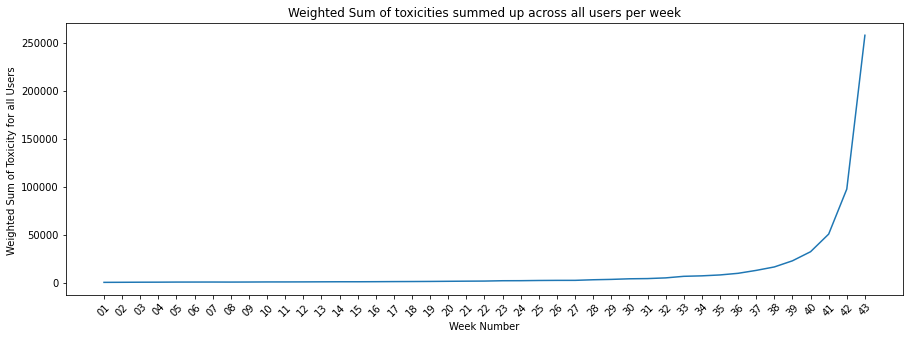

In [11]:
plt.figure(figsize=(15,5))
plt.plot(plot1XAxis[:-1], plot1YAxis[:-1])
plt.xlabel("Week Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per week")
plt.xticks(rotation=45)
plt.show()

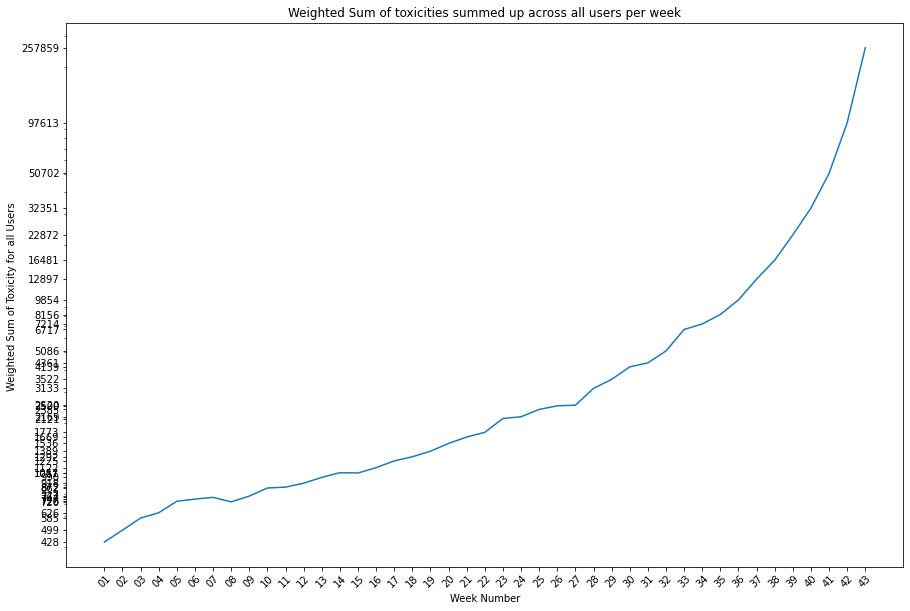

In [12]:
plt.figure(figsize=(15,10))
plt.semilogy(plot1XAxis[:-1], plot1YAxis[:-1])
plt.xlabel("Week Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per week")

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=45)
plt.yticks(plot1YAxis[:-1])
plt.show()

# Plot 2
## Weighted Sum of toxicities summed up across all users per month
> **X Axis** - Month Number (mnth1 mnth2 ... mnth10)

> **Y Axis** - Sum of Toxicity

##### <u>Sample Calcualtion</u>
Lets say I want to calculate this for month 1. First I filter the entire dataframe to month 1 - `monthDf = df[df['month'] == "01"]`. Then, the plot would look something like this: - 
1.   <u>x axis</u> - 01
2.   <u>y axis</u> - `monthDf['Toxicity'].sum()` - Just the some of the entire column in the dataframe as that would give us the net toxicity for that week

In [13]:
def weightedSumToxicityMonth(monthIn):
    monthDf = groupDf[groupDf['month'] == monthIn]
    return monthDf['Toxicity'].sum().round(2)

In [14]:
plot2Arr = []
for i in unique_values_month:
    plot2Arr.append(weightedSumToxicityMonth(i))

In [15]:
plot2XAxis = unique_values_month
plot2YAxis = plot2Arr

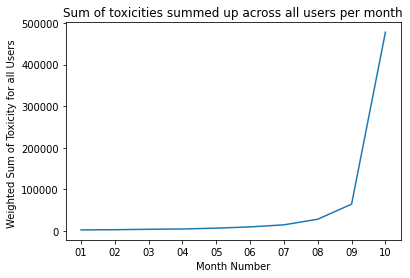

In [16]:
plt.plot(plot2XAxis,plot2YAxis)
plt.xlabel("Month Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Sum of toxicities summed up across all users per month")
plt.show()

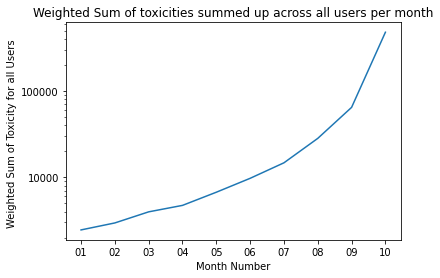

In [17]:
plt.semilogy(plot2XAxis,plot2YAxis)
plt.xlabel("Month Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per month")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# Plot 3
## [Number of Users Vs Average toxicity] for Original tweets
This plot is specifically for *Original Tweets*. <br>
There are 2 subplots in this: - 

1.   <u>Subplot 1</u> - scatter plot - 
  > **X Axis** - Average toxicity of Original Tweets

  > **Y Axis** - Number of Users, (each do with the respective week number)

Calculation - <br>
Lets say we are calculating for week 1, we filter the dataframe for that week - `weekDf = df[df['week'] == "01"]`. After that
*   x axis - avg toxicity for that week (just the mean of toxicity scores)
*   y axis - Count of Unique Users in that Week. (Number of users)

2.   <u>Subplot 2</u> -
  > **X Axis** - Week Number

  > **Y Axis** - Average Toxicity for that week

Calcualtion - <br>
Lets say we are looking at just week 1. Then: - 
*   x axis - 01 (week number)
*   y axis - Mean of all the toxicity scores (tweets) for that week

In [18]:
groupDf2 = groupDf[(groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == False)]

In [19]:
def countNumberOfUsers(weekIn):
    weekDf3_1 = groupDf2[groupDf2['week'] == weekIn]
    return len(weekDf3_1['user_id'].unique())

In [20]:
def countAvgToxicity(weekIn):
    weekDf3_2 = groupDf2[groupDf2['week'] == weekIn]
    return round(weekDf3_2['Toxicity'].mean(),5)

In [21]:
plot3Arr1 = []
plot3Arr2 = []

In [22]:
for i in unique_values_week:
    plot3Arr1.append(countNumberOfUsers(i))
    plot3Arr2.append(countAvgToxicity(i))

In [23]:
plot3XAxis = plot3Arr2
plot3YAxis = plot3Arr1

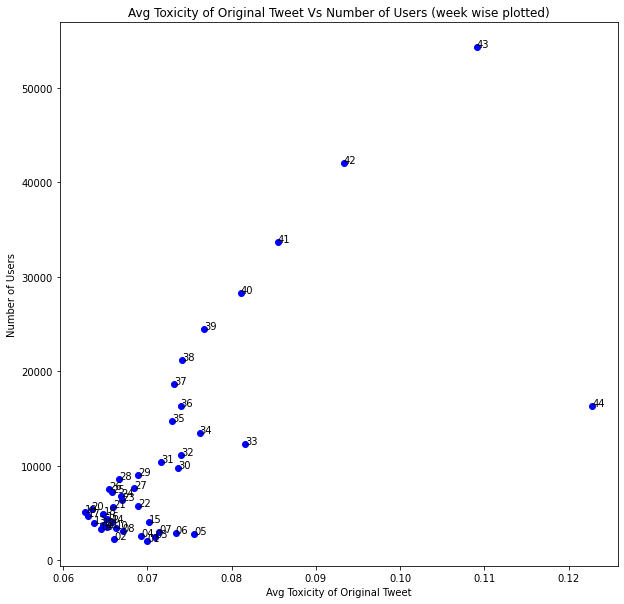

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(plot3XAxis, plot3YAxis, c ="blue")
plt.xlabel("Avg Toxicity of Original Tweet")
plt.ylabel("Number of Users")
plt.title("Avg Toxicity of Original Tweet Vs Number of Users (week wise plotted)")
for i, txt in enumerate(unique_values_week):
    plt.annotate(txt, (plot3XAxis[i], plot3YAxis[i]))
plt.show()

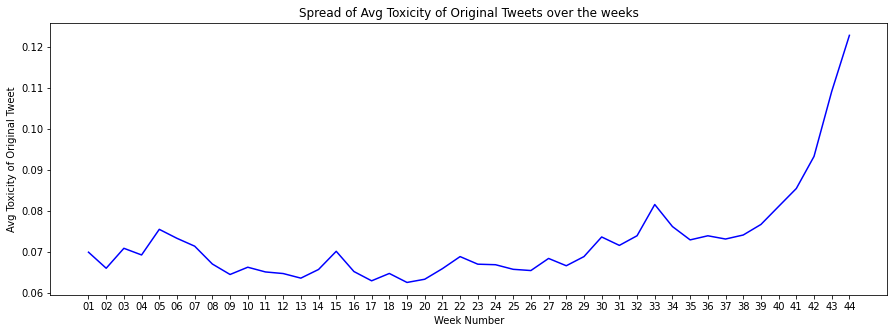

In [25]:
plt.figure(figsize=(15,5))
plt.plot(unique_values_week,plot3XAxis, c ="blue")
plt.xlabel("Week Number")
plt.ylabel("Avg Toxicity of Original Tweet")
plt.title("Spread of Avg Toxicity of Original Tweets over the weeks")
# plt.yticks(plot3YAxis)
plt.show()

# Plot 4
## [Number of Users Vs Average toxicity] for Re-tweets
This plot is specifically for *Re-Tweets*. <br>
There are 2 subplots in this: - 

1.   <u>Subplot 1</u> - scatter plot - 
  > **X Axis** - Average toxicity of Retweets Tweets

  > **Y Axis** - Number of Users, (each do with the respective week number)

Calculation - <br>
Lets say we are calculating for week 1, we filter the dataframe for that week - `weekDf = df[df['week'] == "01"]`. After that
*   x axis - avg toxicity for that week (just the mean of toxicity scores)
*   y axis - Count of Unique Users in that Week. (Number of users)

2.   <u>Subplot 2</u> -
  > **X Axis** - Week Number

  > **Y Axis** - Average Toxicity for that week

Calcualtion - <br>
Lets say we are looking at just week 1. Then: - 
*   x axis - 01 (week number)
*   y axis - Mean of all the toxicity scores (tweets) for that week

In [26]:
#need to do

# Plot 5
## [Number of Users Vs Average toxicity] for Quoted tweets
This plot is specifically for *Quoted Tweets*. <br>
There are 2 subplots in this: - 

1.   <u>Subplot 1</u> - scatter plot - 
  > **X Axis** - Average toxicity of Quoted Tweets

  > **Y Axis** - Number of Users, (each do with the respective week number)

Calculation - <br>
Lets say we are calculating for week 1, we filter the dataframe for that week - `weekDf = df[df['week'] == "01"]`. After that
*   x axis - avg toxicity for that week (just the mean of toxicity scores)
*   y axis - Count of Unique Users in that Week. (Number of users)

2.   <u>Subplot 2</u> -
  > **X Axis** - Week Number

  > **Y Axis** - Average Toxicity for that week

Calcualtion - <br>
Lets say we are looking at just week 1. Then: - 
*   x axis - 01 (week number)
*   y axis - Mean of all the toxicity scores (tweets) for that week

In [27]:
groupDf3 = groupDf[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == False)]

In [28]:
def countNumberOfUsers_quoted(weekIn):
    weekDf5_1 = groupDf3[groupDf3['week'] == weekIn]
    return len(weekDf5_1['user_id'].unique())

In [29]:
def countAvgToxicity_quoted(weekIn):
    weekDf5_2 = groupDf3[groupDf3['week'] == weekIn]
    return round(weekDf5_2['Toxicity'].mean(),5)

In [30]:
plot5Arr1 = []
plot5Arr2 = []

In [31]:
for i in unique_values_week:
    plot5Arr1.append(countNumberOfUsers_quoted(i))
    plot5Arr2.append(countAvgToxicity_quoted(i))

In [32]:
# plot5Arr2

In [33]:
plot5XAxis = plot5Arr2
plot5YAxis = plot5Arr1

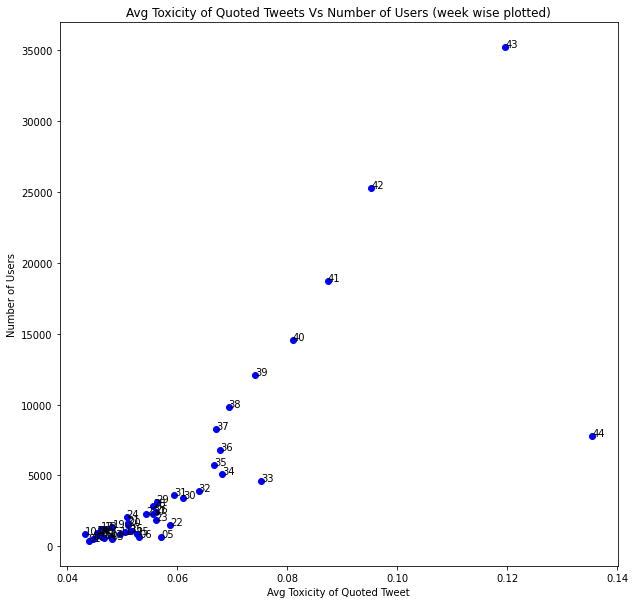

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(plot5XAxis, plot5YAxis, c ="blue")
plt.xlabel("Avg Toxicity of Quoted Tweet")
plt.ylabel("Number of Users")
plt.title("Avg Toxicity of Quoted Tweets Vs Number of Users (week wise plotted)")
# plt.yticks(plot3YAxis)
for i, txt in enumerate(unique_values_week):
    plt.annotate(txt, (plot5XAxis[i], plot5YAxis[i]))
plt.show()

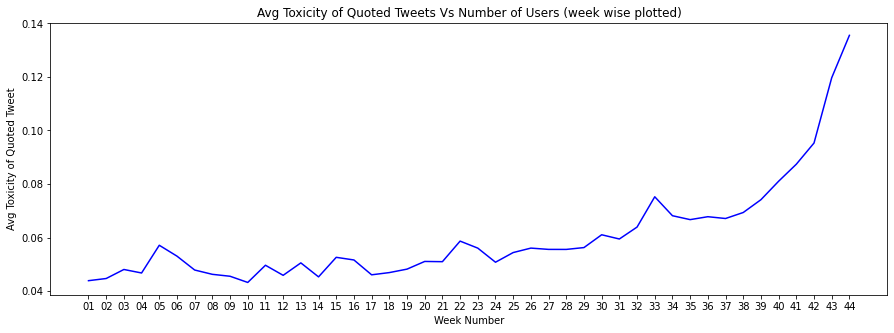

In [35]:
plt.figure(figsize=(15,5))
plt.plot(unique_values_week,plot5XAxis, c ="blue")
plt.xlabel("Week Number")
plt.ylabel("Avg Toxicity of Quoted Tweet")
plt.title("Avg Toxicity of Quoted Tweets Vs Number of Users (week wise plotted)") 
plt.show()

#Plot 7
## Sub Plot 2 - Combination of User Categories Vs Toxicity Buckets

This plot will be created for each month. (so in total 10 plots)

> **X Axis** - Buckets of Toxicity

> **Y Axis** - Number of Users in each combination of user categories. 

The 7 User Categories: - 
1. original tweets - i.e all the tweets done by the user will only be original
2. retweets - i.e all the tweets done by the user will only be quoted.
3. quoted - i.e all the tweets done by the user will only be quoted.
4. original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5. original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6. quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7. original, quoted and retweet - i.e all the tweets done by the user will only be of the type original and retweet.

This is how I want the categorization to be. For example, if:-
*   user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
*   if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'. 
*   if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'
*   if user 4 has 15 tweets out of which 10 retweets and 5 quoted tweets, then the user would go into the category of 'quoted and retweet'

Calcuation: - 
*   You see for each user category how many users fall in which bucket of toxicity, and after that you make the plot. So, if there are 5 users in the bucket 0.1 for the catoegory 'o_q', then it x axis will be 0.1 and y axis will be 5. 









In [36]:
groupDf7 = df[['user_id', 'Toxicity', 'qt_flag', 'rt_flag', 'week', 'month']]

In [37]:
groupDf7['Toxicity'] = groupDf7['Toxicity'] * 10
groupDf7['Toxicity'] = (groupDf7['Toxicity'].apply(np.ceil)) / 10

In [38]:
groupDf7 = groupDf7[groupDf7['Toxicity'] != 0.0]

In [39]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [40]:
def pltMonthPlot7(monthIn):
  monthDf = groupDf7[groupDf7['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.plot(x, y, label=cat)

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.xticks(x)
  plt.legend()
  plt.show()

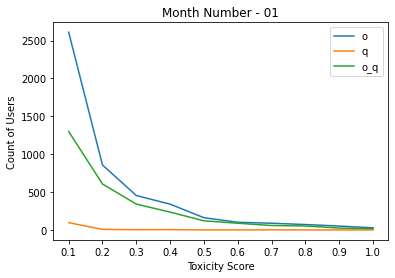

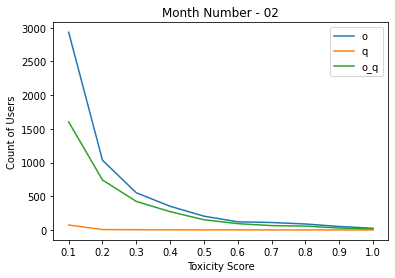

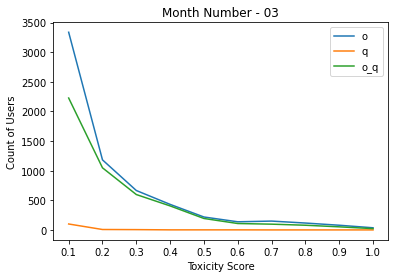

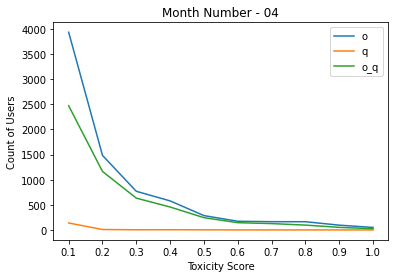

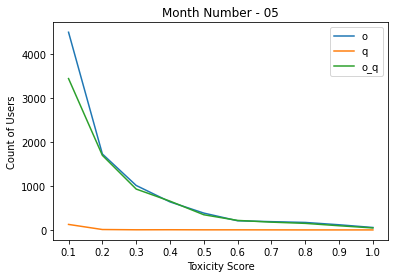

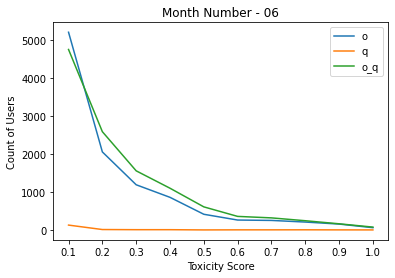

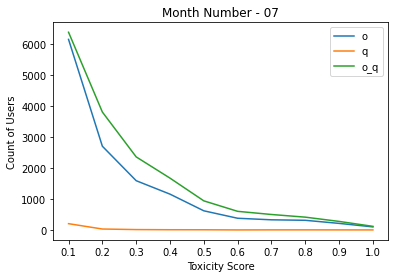

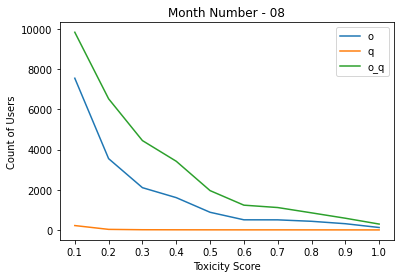

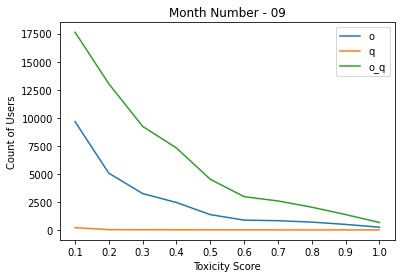

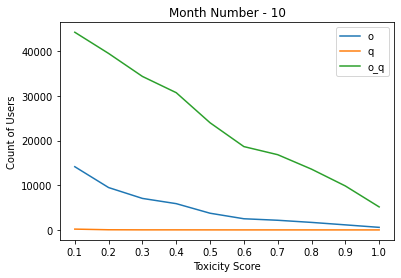

In [41]:
for i in unique_values_month:
  pltMonthPlot7(i)

In [42]:
def pltMonthWithLogPlot7(monthIn):
  monthDf = groupDf7[groupDf7['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.semilogy(x, y, label=cat)

  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.xticks(x)
  plt.legend()
  plt.show()
  

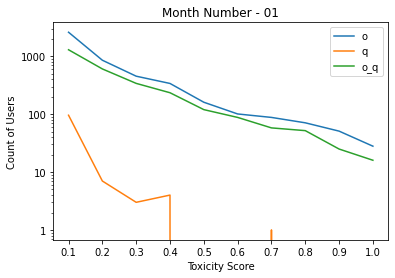

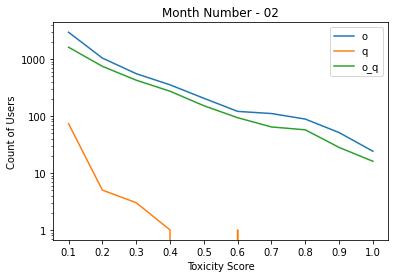

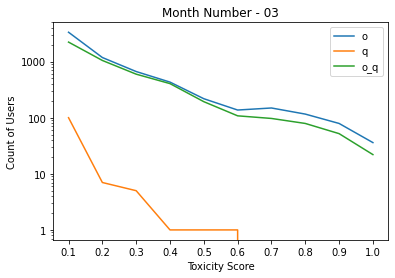

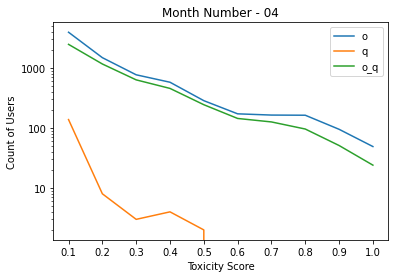

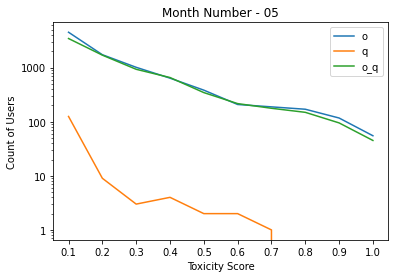

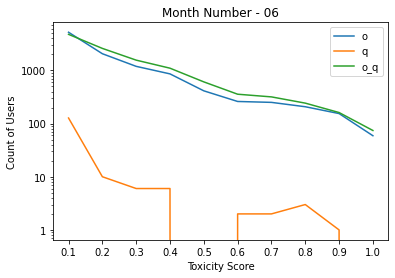

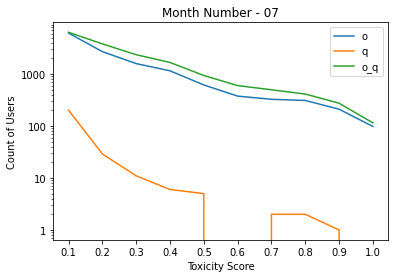

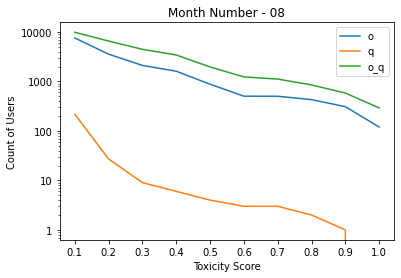

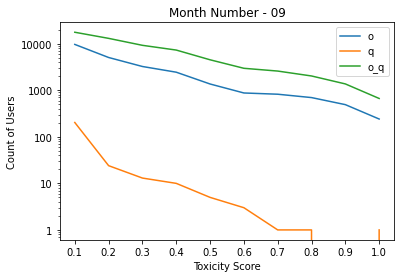

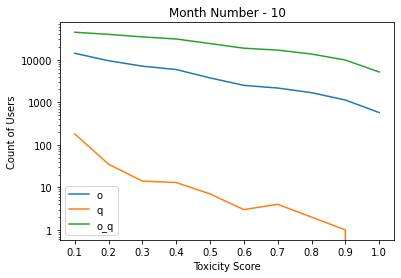

In [43]:
for i in unique_values_month:
  pltMonthWithLogPlot7(i)

#Plot8
## Number of Users Vs Toxicity Buckets
This plot will be created for each month. (so in total 10 plots)

In [44]:
groupDf8 = df[['user_id', 'Toxicity','month']]

In [45]:
def countUsersForMonth(monthIn):
  monthDf = groupDf8[groupDf8['month'] == monthIn]
  groupedDf = monthDf.groupby('user_id').mean()
  groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
  groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10
  groupedDf = groupedDf[groupedDf['Toxicity'] != 0.0]
  dict_cat = {}
  for j in range(10):
      string_want  = f"{(j+1)/10}" 
      dict_cat[string_want] = 0
  for index, row in groupedDf.iterrows():
    t_score = row["Toxicity"]
    string_put = f"{t_score}"
    dict_cat[string_put] += 1
  keys = list(dict_cat.keys())
  values = list(dict_cat.values())
  plt.plot(keys, values)
  plt.xlabel('Toxicity')
  plt.ylabel('Number of Users')
  plt.title(f"Month Number - {monthIn}")
  plt.show()

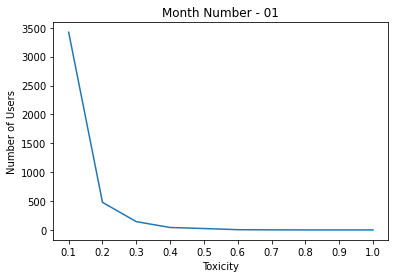

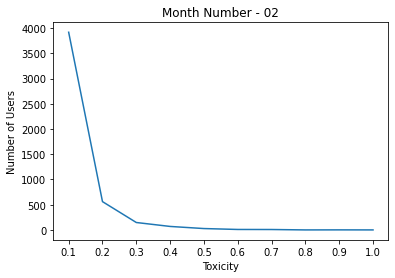

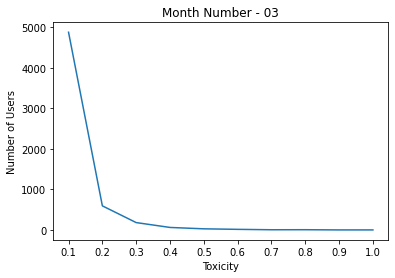

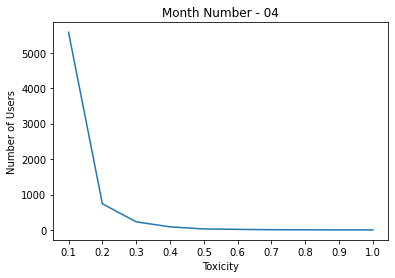

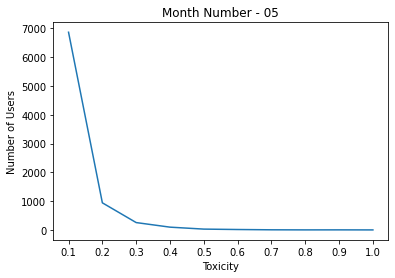

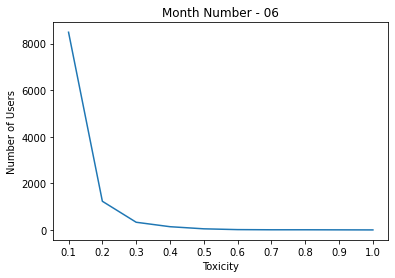

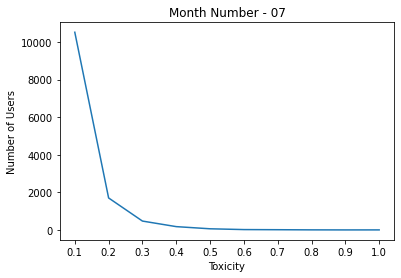

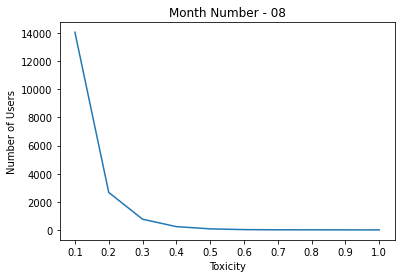

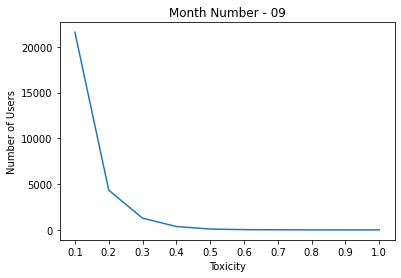

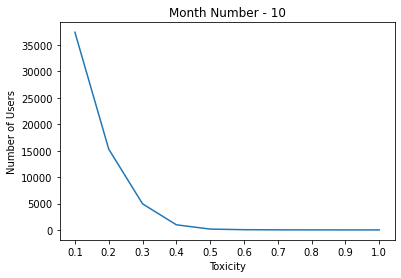

In [46]:
for i in unique_values_month:
  countUsersForMonth(i)

In [47]:
def countUsersForMonthWithLog(monthIn):
  monthDf = groupDf8[groupDf8['month'] == monthIn]
  groupedDf = monthDf.groupby('user_id').mean()
  groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
  groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10
  groupedDf = groupedDf[groupedDf['Toxicity'] != 0.0]
  dict_cat = {}
  for j in range(10):
      string_want  = f"{(j+1)/10}" 
      dict_cat[string_want] = 0
  for index, row in groupedDf.iterrows():
    t_score = row["Toxicity"]
    string_put = f"{t_score}"
    dict_cat[string_put] += 1
  keys = list(dict_cat.keys())
  values = list(dict_cat.values())
  plt.semilogy(keys, values)
  plt.xlabel('Toxicity')
  plt.ylabel('Number of Users')
  plt.title(f"Month Number - {monthIn}")
  plt.show()

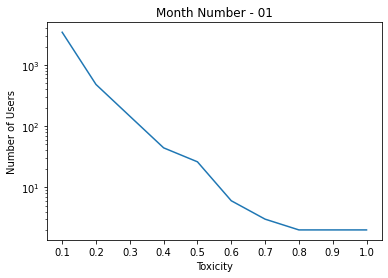

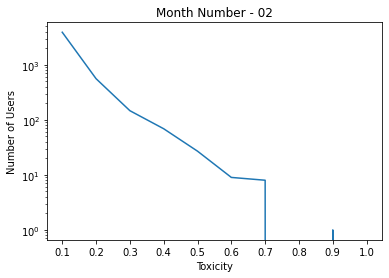

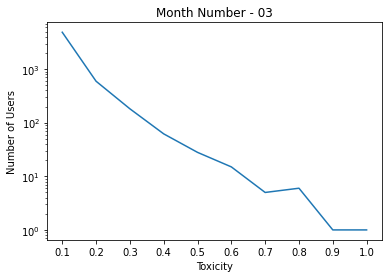

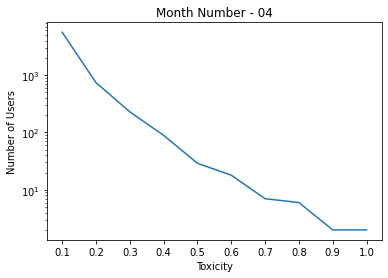

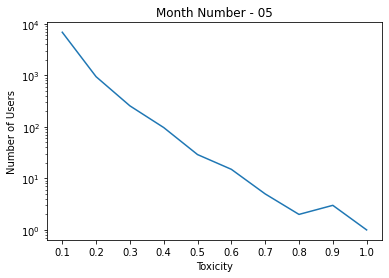

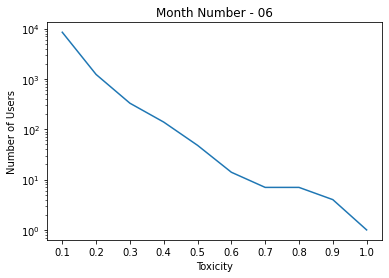

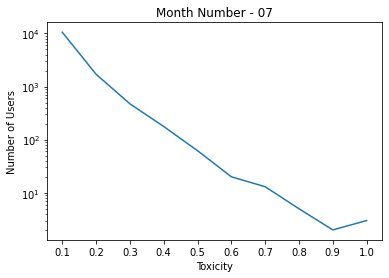

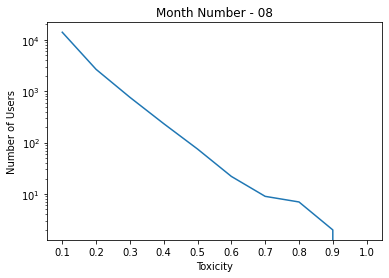

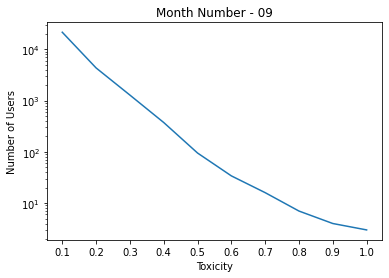

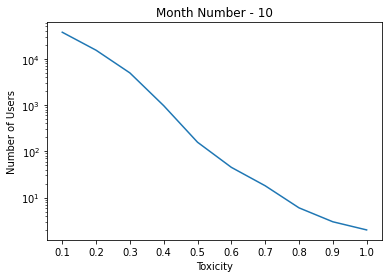

In [48]:
for i in unique_values_month:
  countUsersForMonthWithLog(i)